In [1]:
import numpy as np
import matplotlib.pyplot as plt


class CosineRank:
    def __init__(self):
        pass

    def _cos_sim(self, ref, you):

        return np.dot(ref, you) / (np.linalg.norm(ref) * np.linalg.norm(you))

    def _get_xy(self, data):
        array = np.array([range(1, len(data) + 1), data]).transpose(1, 0)
        array_xy = []

        for t in range(array.shape[0]):
            array_xy.append(list((array[t][0], array[t][1])))

        return np.array(array_xy)

    def _get_cos_sim_result(self, array):
        ref, you = self._get_xy(array[0]), self._get_xy(array[1])
        cos_sim_result = []

        for t in range(len(ref) - 1):
            standard = ref[t]
            ref_temp = np.array(
                [(ref[t + 1][0] - standard[0]), (ref[t + 1][1] - standard[1])]
            )
            you_temp = np.array(
                [
                    (you[t + 1][0] - standard[0]),
                    ((you[t + 1][1] - standard[1]) + (standard[1] - you[t][1])),
                ]
            )
            horizon = np.array([ref_temp[0], 0])

            cos_sim_ref_you, cos_sim_ref_horizon = (
                self._cos_sim(ref_temp, you_temp),
                self._cos_sim(ref_temp, horizon),
            )

            if cos_sim_ref_you >= cos_sim_ref_horizon:
                cos_sim_result.append(cos_sim_ref_you)
            else:
                cos_sim_result.append(0)

        return np.array(cos_sim_result)

    def rank(self, array, ctrl="normal"):

        assert len(array) == 2, "Length of list must be 2"

        points = self._get_cos_sim_result([array[0], array[1]]).mean()

        if points == 0:
            total_points = 0
        else:
            total_points = int(100 * np.log10(points * 10))

        if ctrl == "easy":
            total_points += 20
        elif ctrl == "very easy":
            total_points += 40

        threshold = ["A+", "A", "B+", "B", "C+", "C", "D+", "D", "E+", "E"]

        for i in range(len(threshold)):
            if total_points >= (9 - i) * 10:
                rank = threshold[i]
                break

        return rank, total_points


rank = CosineRank()

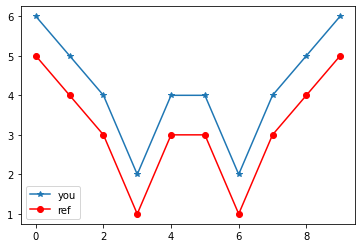

('A+', 99)

In [2]:
# test 1
you = [6, 5, 4, 2, 4, 4, 2, 4, 5, 6]
ref = [5, 4, 3, 1, 3, 3, 1, 3, 4, 5]

plt.plot(you, marker="*")
plt.plot(ref, color="red", marker="o")
plt.legend(["you", "ref"])
plt.show()

rank.rank([you, ref])

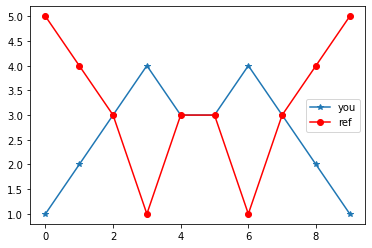

('E', 4)

In [3]:
# test 2
you = [1, 2, 3, 4, 3, 3, 4, 3, 2, 1]
ref = [5, 4, 3, 1, 3, 3, 1, 3, 4, 5]

plt.plot(you, marker="*")
plt.plot(ref, color="red", marker="o")
plt.legend(["you", "ref"])
plt.show()

rank.rank([you, ref])

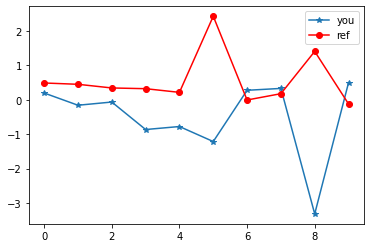

('D', 28)

In [4]:
# test 3
you = np.random.randn(10)
ref = np.random.randn(10)

plt.plot(you, marker="*")
plt.plot(ref, color="red", marker="o")
plt.legend(["you", "ref"])
plt.show()

rank.rank([you, ref])

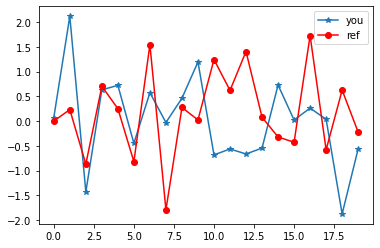

('C', 44)

In [5]:
# test 4
you = np.random.randn(20)
ref = np.random.randn(20)

plt.plot(you, marker="*")
plt.plot(ref, color="red", marker="o")
plt.legend(["you", "ref"])
plt.show()

rank.rank([you, ref])

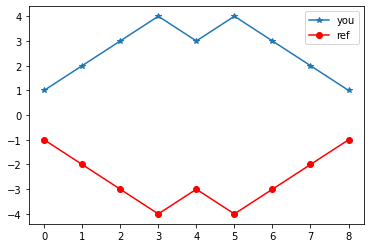

('E', 0)

In [6]:
# test 5
you = [1, 2, 3, 4, 3, 4, 3, 2, 1]
ref = [-1, -2, -3, -4, -3, -4, -3, -2, -1]

plt.plot(you, marker="*")
plt.plot(ref, color="red", marker="o")
plt.legend(["you", "ref"])
plt.show()

rank.rank([you, ref])